# **American Express - Default Prediction**

Team:



*   Demetrius Hernandez
*   Estevan Ramos
*   Jeffrey Escamilla





---





# **Imports**

In [ ]:
import numpy as np
import pandas as pd
import cudf

from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Data**

In [ ]:
#for Demi
x = pd.read_csv('/content/drive/MyDrive/Deep Learning/Project 1/small_train.csv')
y = pd.read_csv('/content/drive/MyDrive/Deep Learning/Project 1/small_labels.csv')

In [ ]:
#For steve
x = pd.read_csv('/content/drive/MyDrive/Machine Learning/DL Project 1/small_train.csv')
y = pd.read_csv('/content/drive/MyDrive/Machine Learning/DL Project 1/small_labels.csv')

# **Background**

We will be using American Express data to predict credit default. The labels are generated by observing an 18 month performance window and if the customer does not pay the due amount in 120 days after the latest statement date, then it is considered a default event. 

The Features of the data are anonymized, normalized, and are categorized into the following groups:

*   D_* = Delinquency variables
*   S_* = Spend variables
*   P_* = Payment variables
*   B_* = Balance variables
*   R_* = Risk variables

In [ ]:
x

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,2017-07-15,0.608304,0.002245,0.015774,0.812785,0.500715,0.111703,0.008880,0.011113,...,NaN,NaN,NaN,0.000580,0.008281,0.004493,NaN,0.003352,0.003254,0.007920
199995,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,2017-08-28,0.539011,0.002428,0.006173,1.006607,0.007721,0.155389,0.002317,0.014583,...,NaN,NaN,NaN,0.001474,0.005978,0.003926,NaN,0.007297,0.006689,0.009181
199996,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,2017-09-15,0.545751,0.062144,0.014536,0.816225,0.009416,0.145824,0.007354,0.011436,...,NaN,NaN,NaN,0.003072,0.008800,0.000814,NaN,0.003730,0.005946,0.006949
199997,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,2017-10-10,0.579735,0.009152,0.010878,0.815024,0.005641,0.149669,0.001961,0.008332,...,NaN,NaN,NaN,0.006708,0.007236,0.007473,NaN,0.004778,0.000594,0.001202


In [ ]:
y

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
199994,6f5b16e1cefd6d9621ca8f19e71a1403cb4ad8839febf7...,0
199995,6f5b9f76bafe6d6d506e18dffcab37743bf7d85d82933c...,0
199996,6f5bcdc679cc2676355f352d050b33feaa28b47cd8073b...,0
199997,6f5beaa9f466d94f5bfe63c57b01ccb12bcef15cd0c850...,1


In [ ]:
#Function to display all cols and rows that have missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing = missing_values_table(x)
missing

Your selected dataframe has 190 columns.
There are 120 columns that have missing values.


,Missing Values,% of Total Values
D_87,199883,99.9
D_88,199735,99.9
D_108,198941,99.5
D_110,198767,99.4
D_111,198767,99.4
...,...,...
B_6,7,0.0
R_20,6,0.0
R_12,2,0.0
B_40,1,0.0


In [ ]:
def feature_engineer(train, PAD_CUSTOMER_TO_13_ROWS = True, targets = None):
        
    # REDUCE STRING COLUMNS 
    # from 64 bytes to 8 bytes, and 10 bytes to 3 bytes respectively
    train['customer_ID'] = train['customer_ID'].str[-16:].str.hex_to_int().astype('int64')
    train.S_2 = cudf.to_datetime( train.S_2 )
    train['year'] = (train.S_2.dt.year-2000).astype('int8')
    train['month'] = (train.S_2.dt.month).astype('int8')
    train['day'] = (train.S_2.dt.day).astype('int8')
    del train['S_2']
        
    # LABEL ENCODE CAT COLUMNS (and reduce to 1 byte)
    # with 0: padding, 1: nan, 2,3,4,etc: values
    d_63_map = {'CL':2, 'CO':3, 'CR':4, 'XL':5, 'XM':6, 'XZ':7}
    train['D_63'] = train.D_63.map(d_63_map).fillna(1).astype('int8')

    d_64_map = {'-1':2,'O':3, 'R':4, 'U':5}
    train['D_64'] = train.D_64.map(d_64_map).fillna(1).astype('int8')
    
    CATS = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_66', 'D_68']
    OFFSETS = [2,1,2,2,3,2,3,2,2] #2 minus minimal value in full train csv
    # then 0 will be padding, 1 will be NAN, 2,3,4,etc will be values
    for c,s in zip(CATS,OFFSETS):
        train[c] = train[c] + s
        train[c] = train[c].fillna(1).astype('int8')
    CATS += ['D_63','D_64']
    
    # ADD NEW FEATURES HERE
    # EXAMPLE: train['feature_189'] = etc etc etc
    # EXAMPLE: train['feature_190'] = etc etc etc
    # IF CATEGORICAL, THEN ADD TO CATS WITH: CATS += ['feaure_190'] etc etc etc
    
    # REDUCE MEMORY DTYPE
    SKIP = ['customer_ID','year','month','day']
    for c in train.columns:
        if c in SKIP: continue
        if str( train[c].dtype )=='int64':
            train[c] = train[c].astype('int32')
        if str( train[c].dtype )=='float64':
            train[c] = train[c].astype('float32')
            
    # PAD ROWS SO EACH CUSTOMER HAS 13 ROWS
    if PAD_CUSTOMER_TO_13_ROWS:
        tmp = train[['customer_ID']].groupby('customer_ID').customer_ID.agg('count')
        more = cupy.array([],dtype='int64') 
        for j in range(1,13):
            i = tmp.loc[tmp==j].index.values
            more = cupy.concatenate([more,cupy.repeat(i,13-j)])
        df = train.iloc[:len(more)].copy().fillna(0)
        df = df * 0 - 1 #pad numerical columns with -1
        df[CATS] = (df[CATS] * 0).astype('int8') #pad categorical columns with 0
        df['customer_ID'] = more
        train = cudf.concat([train,df],axis=0,ignore_index=True)
        
    # ADD TARGETS (and reduce to 1 byte)
    if targets is not None:
        train = train.merge(targets,on='customer_ID',how='left')
        train.target = train.target.astype('int8')
        
    # FILL NAN
    train = train.fillna(-0.5) #this applies to numerical columns
    
    # SORT BY CUSTOMER THEN DATE
    train = train.sort_values(['customer_ID','year','month','day']).reset_index(drop=True)
    train = train.drop(['year','month','day'],axis=1)
    
    # REARRANGE COLUMNS WITH 11 CATS FIRST
    COLS = list(train.columns[1:])
    COLS = ['customer_ID'] + CATS + [c for c in COLS if c not in CATS]
    train = train[COLS]
    
    return train


In [1]:
x.info(max_cols=200, show_counts=True)

NameError: ignored

# **Data Analysis**

Number of Delinquency variables: 97
Number of Spend variables: 22
Number of Payment variables: 3
Number of Balance variables: 40
Number of Risk variables: 28


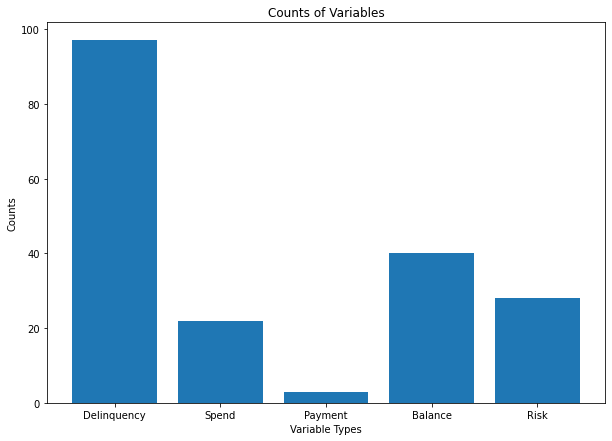

In [ ]:
column_names = x.columns.values

names = ['Delinquency', 'Spend', 'Payment', 'Balance', 'Risk']
counts = [0, 0, 0, 0, 0]


for i in range(len(column_names)):
  if ('D' in column_names[i]):
    counts[0] += 1
  elif('S' in column_names[i]):
    counts[1] += 1
  elif('P' in column_names[i]):
    counts[2] += 1
  elif('B' in column_names[i]):
    counts[3] += 1
  elif('R' in column_names[i]):
    counts[4] += 1

print(f"Number of Delinquency variables: {counts[0]}")
print(f"Number of Spend variables: {counts[1]}")
print(f"Number of Payment variables: {counts[2]}")
print(f"Number of Balance variables: {counts[3]}")
print(f"Number of Risk variables: {counts[4]}")

if (not (counts[0] + counts[1] + counts[2] + counts[3] + counts[4]) == len(column_names)):
  print("\nMiscounted the labels of columns")

# Creating grah
fig, ax = plt.subplots(figsize = (10, 7))
plt.bar(names, counts)
plt.title('Counts of Variables')
plt.xlabel('Variable Types')
plt.ylabel('Counts')
plt.show()

We found that there are a few features of our dataset that are categorical, and we need to represent these values as numbers so that we can send them to the neural network. A onehot encoding can be used to represent those features. 

We also have missing data points in our dataset for certain training examples. There are several options to fix these missing data points, specifically, interpolating the values or deleting the rows/columns that have missing values.

# **Cleaning Data**

In [ ]:
# Dropping customer_ID column
x.drop('customer_ID', inplace=True, axis=1)
y.drop('customer_ID', inplace=True, axis=1)

In [ ]:
# Convert to Numpy Array
x_train = np.asarray(x)
y_train = np.asarray(y)

In [ ]:
# Shuffle the order of the training examples.
indices = np.arange(x_train.shape[0])
shuffled_indices = np.random.permutation(indices)

x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

In [ ]:
# Show the data shapes.
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)

x_train.shape: (199999, 189)
y_train.shape: (199999, 1)


In [ ]:
print(x_train[0])

['2017-03-09' 0.6440820101418321 0.0096419532652126 0.4823810244676004
 0.178785528049254 0.0075774198186638 0.1152762520088762
 0.0070600778467726 0.0746529260130079 nan 0.056483329167965
 0.0028593573421688 0.2587025532823053 0.2184912422024247
 0.0109367486647341 0.0012779191596866 0.315122101619372
 0.6111726852290091 0.1698652672593659 nan 0.013238002431834
 0.469981086972878 0.0049984032416894 0.078424132737754 0.0073414748997568
 0.5256701795050617 0.2002738424142433 0.0731443873515988
 0.6397875967965282 0.0501892811785784 0.0077981135117628
 0.1436397470822821 0.4761213917886915 0.0078814290581656
 1.0003400157853954 0.0044378816620612 0.089806841338891
 0.0319972354714033 0.4702571437497738 0.3164047381880185
 0.0831678266748965 0.0511621406092323 0.0097389061143968
 0.0729330944488219 0.0114020433374405 0.2947587320531742
 0.2724111054482916 0.8780809178789538 0.7797076486537486
 0.0007266061222133 0.12898490578544 0.0134704108140201 'CO' 'O'
 0.0005320255810226 1.0096121379

In [ ]:
print(y_train[0])

[0]
